# Importando bibliotecas e carregando dataset

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

student_habits_df = pd.read_csv('student_habits_performance.csv')
student_habits_df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [90]:
student_habits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

## Hipóteses

1. Alunos com maior número de horas de sono tem melhor desempenho acadêmico
2. Alunos com maior número de horas de redes sociais tem pior desempenho acadêmico
3. Alunos com maior número de horas de estudo tem melhores resultados

## Verificando valores vazios

In [91]:
student_habits_df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [92]:
student_habits_df.dropna(inplace=True)
student_habits_df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


## Verificando valores zerados

In [93]:
zero_counts = (student_habits_df == 0).sum()
cols_with_zeros = zero_counts[zero_counts > 0]
print(cols_with_zeros)

study_hours_per_day     12
social_media_hours      20
netflix_hours           52
exercise_frequency     132
dtype: int64


Verificando os valores zerados, eles fazem sentido pois tanto o número de horas de estudo, netflix, redes sociais e frequência de atividade física podem ser zero. Dessa forma, vamos prosseguir sem tratamento

## Verificando outliers

In [94]:
numeric_columns = student_habits_df.select_dtypes(include='number').columns
numeric_columns = numeric_columns.to_list()
numeric_columns

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating',
 'exam_score']

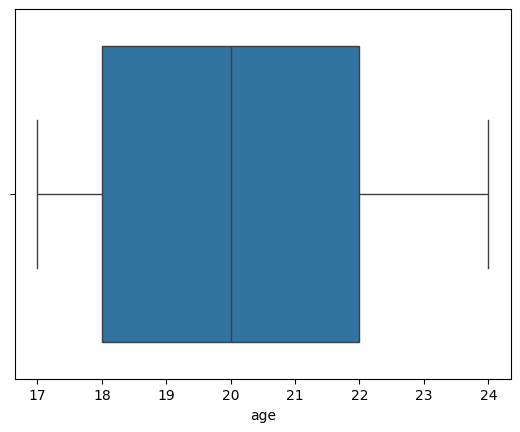

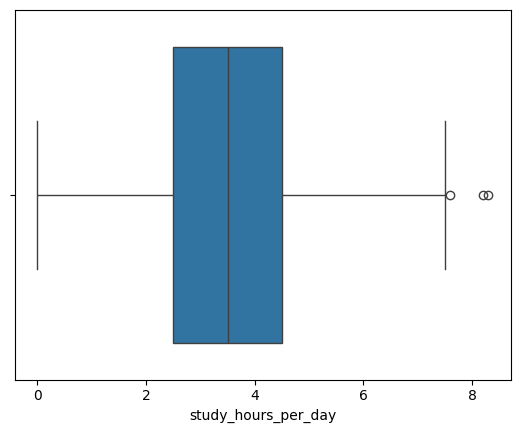

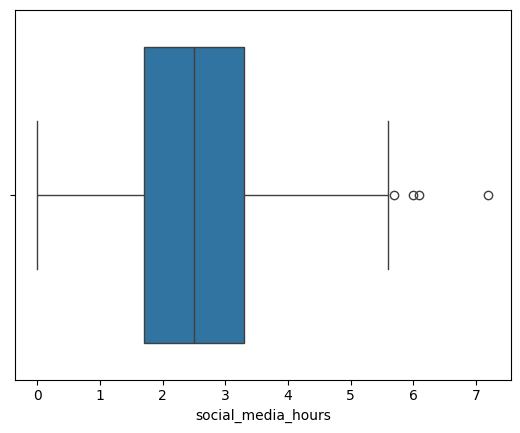

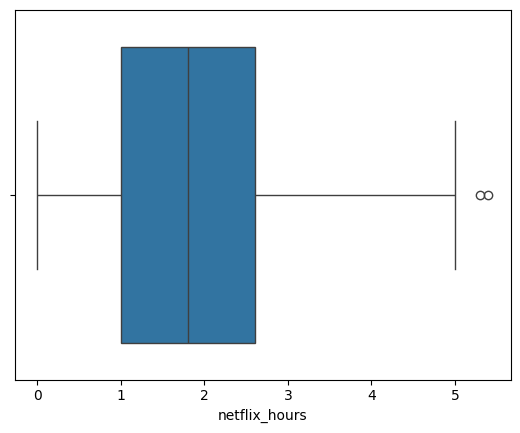

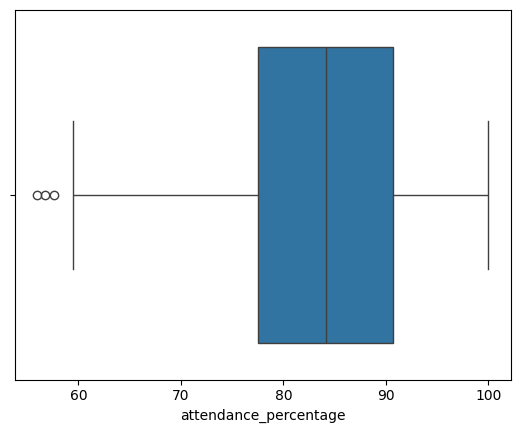

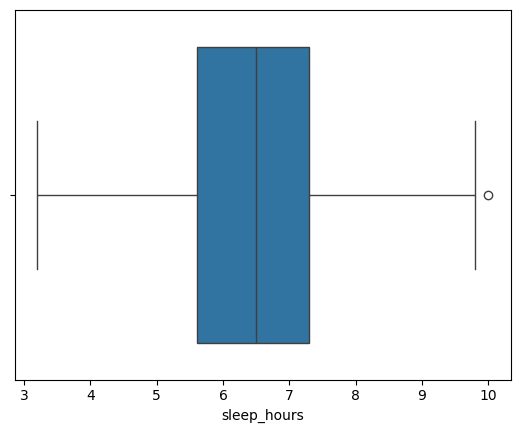

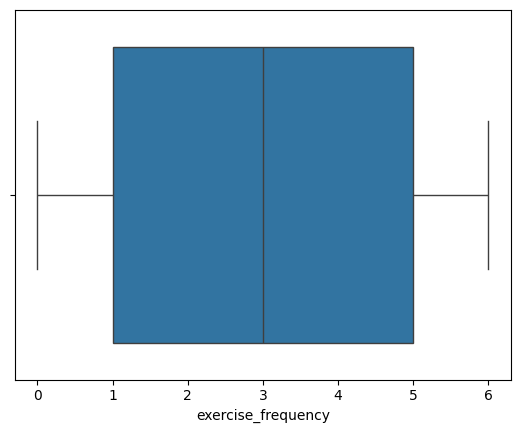

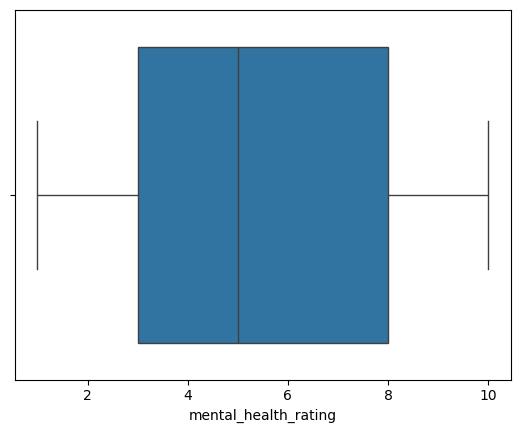

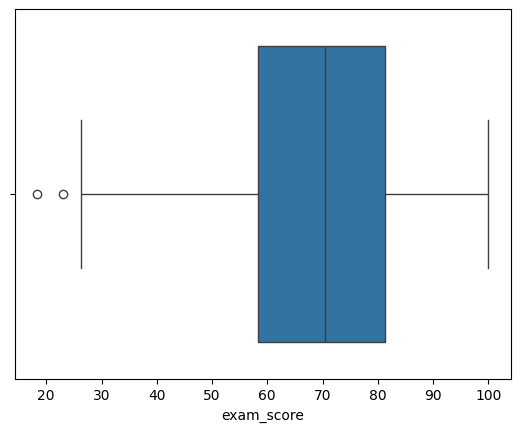

In [95]:
for col in student_habits_df[numeric_columns]:
  sns.boxplot(data=student_habits_df, x=student_habits_df[col])
  plt.show()

Visto que o dataset não tem outliers significativos, não será necessário fazer a remoção dessas linhas, sendo assim, seguimos para a EDA

# 1 - EDA

## Colunas numéricas

In [96]:
student_habits_df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


Com essa função describe podemos ter uma noção do público dessa pesquisa:

* Idade: 20 anos e 6 meses, aproximadamente;
* Horas de estudo por dia: mais de 3 horas e meia;
* Tempo gasto em redes sociais: 2 horas e meia;
* Tempo gasto assistindo netflix: um pouco menos que 2 horas;
* Frequência em aulas: mais de 80%;
* Horas de sono: 6 horas e meia, aproximadamente;
* Frequência de atividade física: 3 dias por semana;
* Saúde mental (pontuação de 0 a 10): 5,46;
* Nota média: 69,55




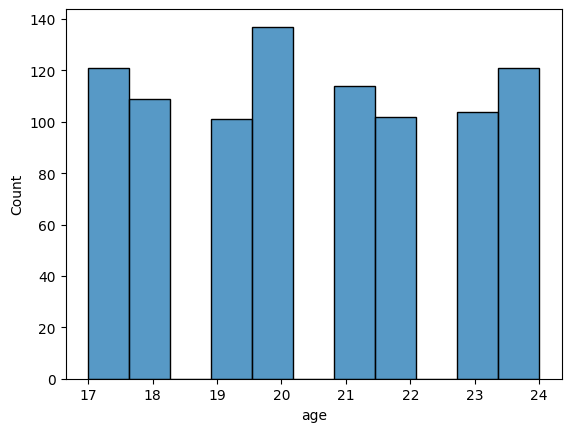

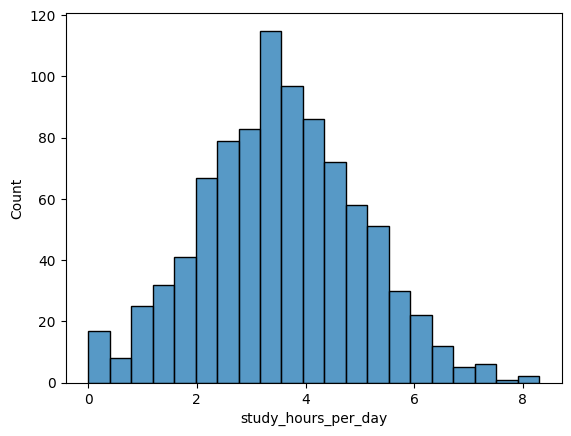

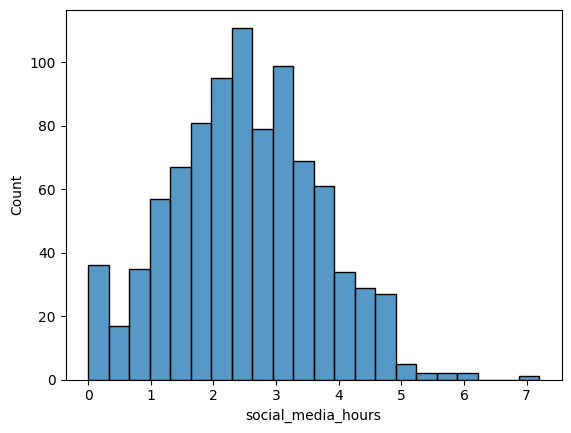

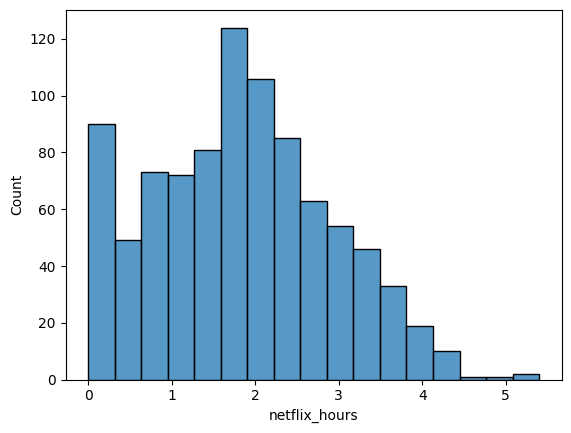

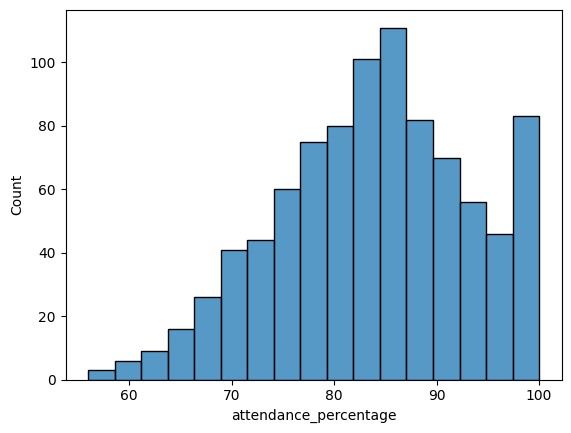

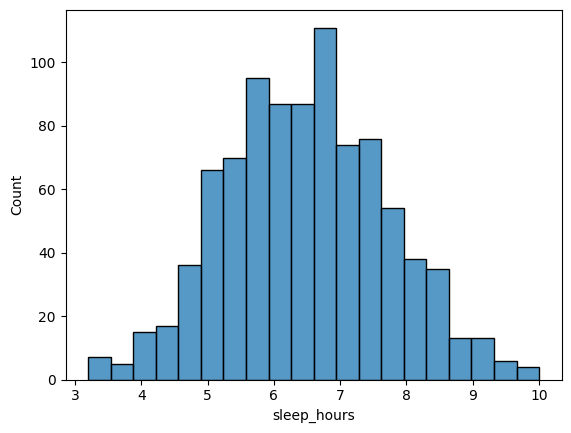

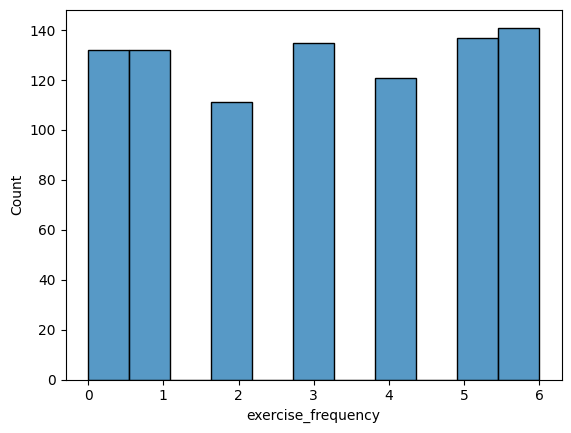

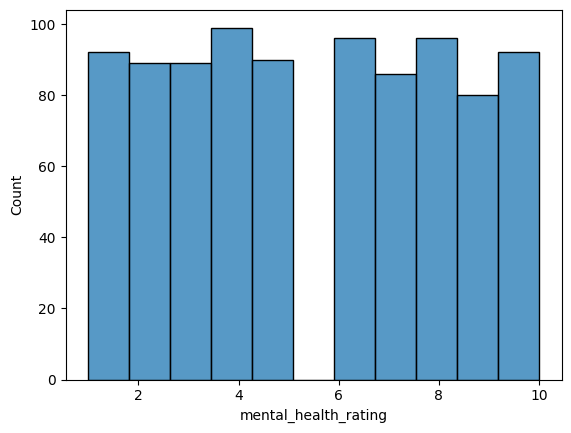

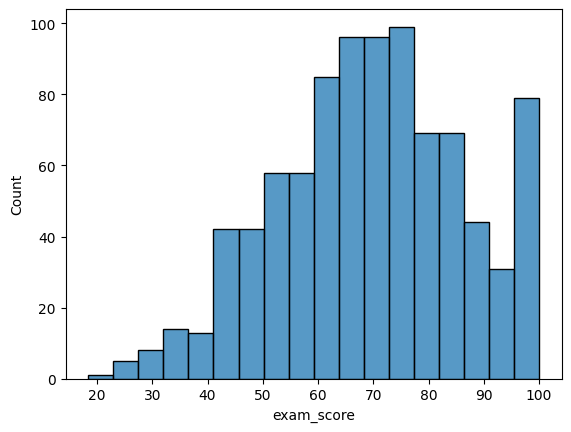

In [97]:
for col in student_habits_df[numeric_columns]:
  sns.histplot(data=student_habits_df, x=student_habits_df[col])
  plt.show()

## Colunas com texto

Para avaliar as colunas com strings, vamos fazer outro recorte:

In [98]:
text_df = student_habits_df.select_dtypes(include='object')
text_columns = text_df.columns.to_list()
student_habits_df[text_columns].mode().iloc[0]

,0
student_id,S1000
gender,Male
part_time_job,No
diet_quality,Fair
parental_education_level,High School
internet_quality,Good
extracurricular_participation,No


Além dos atributos observados anteriormente, podemos observar que a maioria dos alunos nesse dataset são:

* Homens;
* Não tem um "part time job";
* Tem uma dieta "razoável";
* Os pais tem ensino médio concluído;
* Possuem uma qualidade de acesso "bom" a internet;
* Não exercem atividades extracurriculares;

# 2 - Análise das hipóteses

1. Alunos com maior número de horas de sono tem melhor desempenho acadêmico
2. Alunos com maior número de horas da atividade física tem maior saúde mental
3. Alunos com maior número de horas de estudo tem melhores resultados

## Horas de Sono X Desempenho Acadêmico

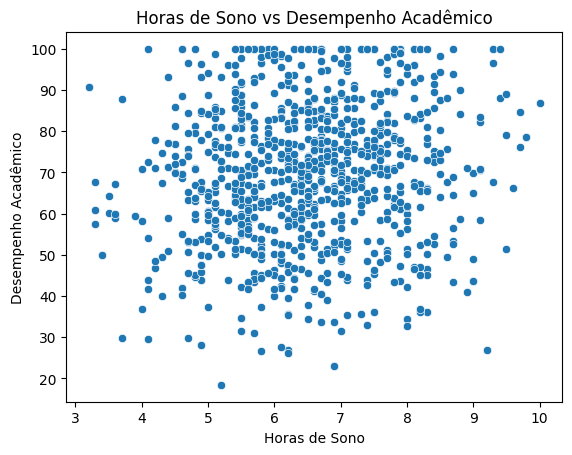

In [99]:
sns.scatterplot(data=student_habits_df, x='sleep_hours', y='exam_score')
plt.title('Horas de Sono vs Desempenho Acadêmico')
plt.xlabel('Horas de Sono')
plt.ylabel('Desempenho Acadêmico')
plt.show()

## Horas de Redes Sociais X Desempenho Acadêmico

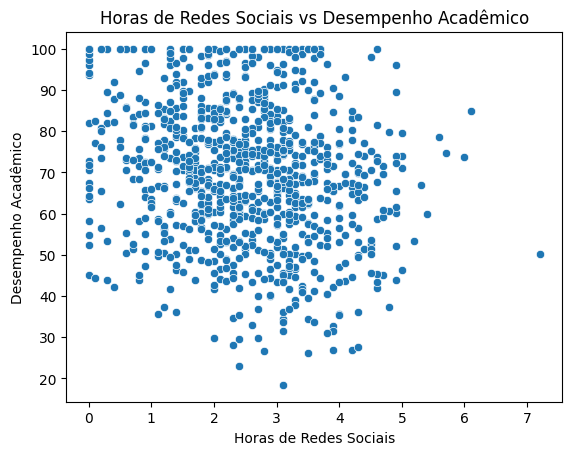

In [100]:
sns.scatterplot(
    data=student_habits_df,
    x="social_media_hours",
    y="exam_score",
)

plt.title("Horas de Redes Sociais vs Desempenho Acadêmico")
plt.xlabel("Horas de Redes Sociais")
plt.ylabel("Desempenho Acadêmico")
plt.show()

Podemos observar que há uma tendência no gráfico de dispersão que nos diz que um menor número de horas em redes sociais pode estar associada a uma melhorar no desempenho acadêmico

## Horas de Estudo X Desempenho Acadêmico

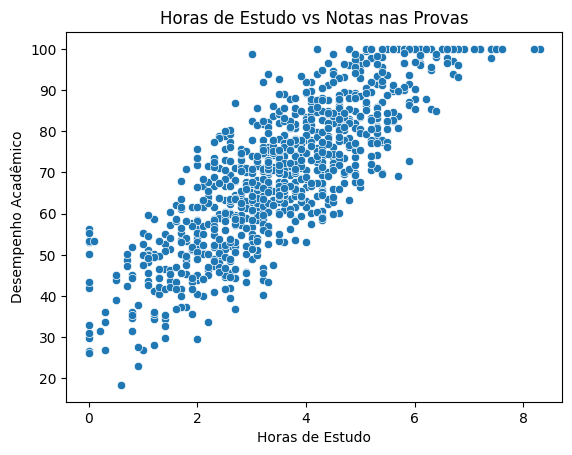

In [101]:
sns.scatterplot(data=student_habits_df, x='study_hours_per_day', y='exam_score')
plt.title('Horas de Estudo vs Notas nas Provas')
plt.xlabel('Horas de Estudo')
plt.ylabel('Desempenho Acadêmico')
plt.show()

Como podemos observar, foi possível identificar uma relação entre as horas de estudo e o desempenho acadêmico

# 3 - Clusterização

In [102]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Definindo colunas a serem usadas na clusterização

In [103]:
features = student_habits_df[[
    "sleep_hours",
    "exam_score",
    "social_media_hours",
    "study_hours_per_day"
]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

## Método cotovelo

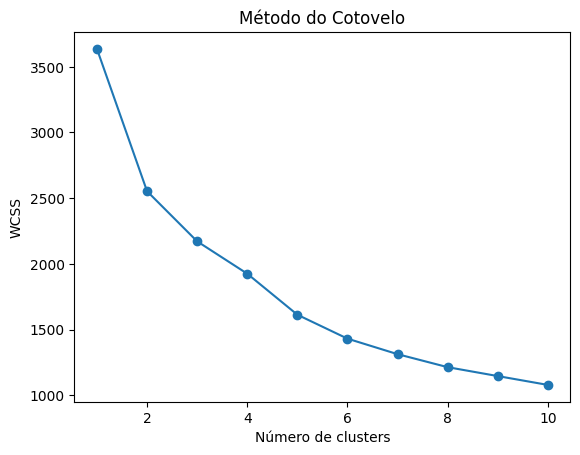

In [104]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Para determinar o número ideal de clusters (K) a ser utilizado no algoritmo de K-Means, foi utilizado o método do cotovelo. Essa técnica consiste em plotar o valor do WCSS (Within-Cluster Sum of Squares), que representa a soma das distâncias quadradas entre cada ponto e o centróide de seu cluster, para diferentes valores de K. Após análise do método cotovelo, concluí que o número ideal de clusters seria 3.

In [105]:
kmeans = KMeans(n_clusters=3, random_state=42)
student_habits_df["cluster"] = kmeans.fit_predict(X_scaled)

# 4 - Testando Clusterização com as Hipóteses Prévias

## Horas de Sono X Desempenho Acadêmico

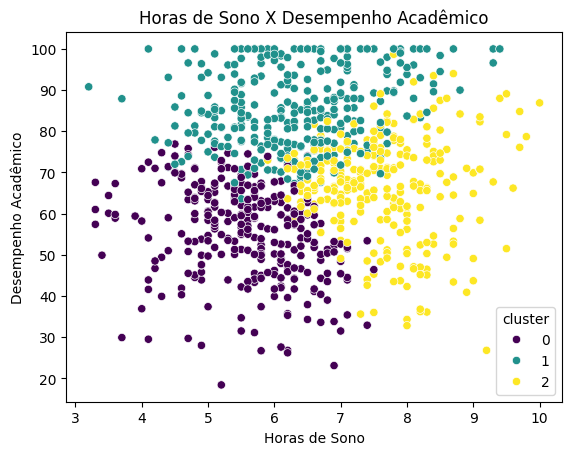

In [106]:
sns.scatterplot(
    data=student_habits_df,
    x="sleep_hours",
    y="exam_score",
    hue="cluster",
    palette="viridis"
)

plt.title("Horas de Sono X Desempenho Acadêmico")
plt.xlabel("Horas de Sono")
plt.ylabel("Desempenho Acadêmico")
plt.show()

Podemos observar no gráfico acima, 3 grupos claramente bem separados. O grupo (cluster) 0 é composto por pessoas que dormem entre 3 e 7 horas e que tem desempenho que varia de 30 a 70 pontos nos exames (provas). O grupo 1 é composto por pessoas que dormem mais de 6 horas e tem desempenho, em sua maioria, ente 60 e 80 pontos nos exames. E o grupo 2, é composto por pessoas que dormem 5 ou mais horas e tem desempeho excepcional e tem seus resultados concentrados entre 70 e 100 pontos.

## Horas de Redes Sociais X Desempenho Acadêmico

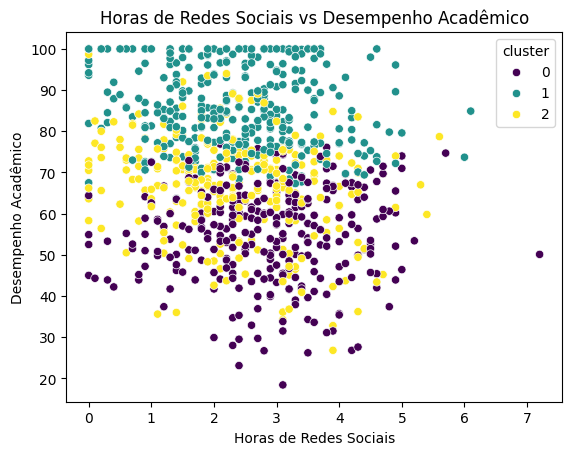

In [107]:
sns.scatterplot(
    data=student_habits_df,
    x="social_media_hours",
    y="exam_score",
    hue="cluster",
    palette="viridis"
)

plt.title("Horas de Redes Sociais vs Desempenho Acadêmico")
plt.xlabel("Horas de Redes Sociais")
plt.ylabel("Desempenho Acadêmico")
plt.show()

Quanto ao gráfico acima, podemos perceber que há uma interseção entre todos os clusteres, porém a tendência geral indica que quanto menos horas nas redes sociais, maior será o seu desempenho acadêmico.

## Horas de Estudo X Desempenho Acadêmico

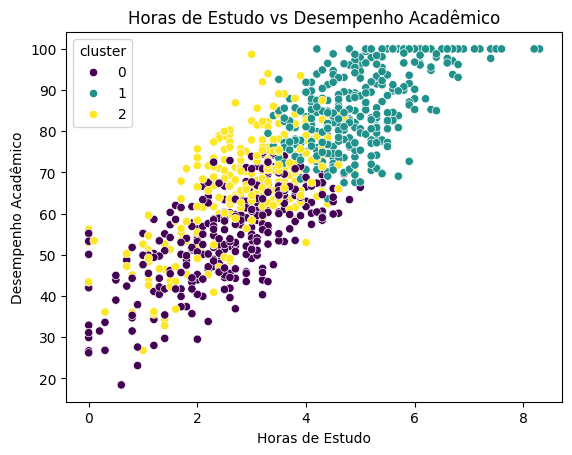

In [108]:
sns.scatterplot(
    data=student_habits_df,
    x="study_hours_per_day",
    y="exam_score",
    hue="cluster",
    palette="viridis"
)

plt.title("Horas de Estudo vs Desempenho Acadêmico")
plt.xlabel("Horas de Estudo")
plt.ylabel("Desempenho Acadêmico")
plt.show()

O gráfico acima, por sua vez, nos mostra 2 grupos (0 e 2) que tem uma interseção entre si, e um grupo bem definido (1). Os grupos 0 e 2 são compostos por pessoas que estudam até 4 horas por dia e tem desempenho que se concentra entre 40 e 80 pontos. O grupo 1, por sua vez, é composto por indivíduos que estudam 4 horas ou mais por dia e seu suas notas estão majoritariamente acima de 70.

# 5 - Conclusão

Analisando os 3 gráficos, podemos perceber que o grupo de verde é composto por indivíduos que usam dormem razoavelmente bem (entre 5 e 8 horas), costumam acessar menos as redes sociais (até 4 horas por dia) e dedicam, pelo menos, 4 horas de estudo por dia. Sendo assim, podemos começar a construir um perfil para os alunos com maior performance, que poderia ser continuado depois com uma análise mais aprofundada de outros elementos, mas esses analisados nesse notebook começam a nortear qual seria o perfil de um aluno de alto desempenho acadêmico, considerando o dataset em questão.